## Import Library

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

rcParams['figure.figsize'] = (15, 10)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import pickle


## Read Dataset

In [4]:
df = pd.read_excel('mesh_data_summary.xlsx')

In [5]:
df.head()

,File Name,Surface Area,Bounding Box X,Bounding Box Y,Bounding Box Z,Number of Vertices,Number of Faces,Mean Curvature,Volume,Weight,Volume_cm
0,data001.obj,2.781045,1.696240,1.261841,1.889681,17284,32981,-2.149612,0.009076,22.664503,32.377861
1,data002.obj,2.289306,1.392986,1.288180,1.536155,13001,25316,1.172161,0.007145,17.842032,25.488617
2,data003.obj,3.984924,1.482570,1.390982,1.936729,23400,44678,-15.724077,0.012349,30.838471,44.054958
3,data004.obj,3.945694,1.929188,1.408530,1.201595,23220,44473,-12.558905,0.012351,30.844244,44.063206
4,data005.obj,3.494035,1.960985,1.440537,1.020920,21434,40588,-7.809807,0.011146,27.835574,39.765106


## Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   File Name           70 non-null     object 
 1   Surface Area        70 non-null     float64
 2   Bounding Box X      70 non-null     float64
 3   Bounding Box Y      70 non-null     float64
 4   Bounding Box Z      70 non-null     float64
 5   Number of Vertices  70 non-null     int64  
 6   Number of Faces     70 non-null     int64  
 7   Mean Curvature      70 non-null     float64
 8   Volume              70 non-null     float64
 9   Weight              70 non-null     float64
 10  Volume_cm           70 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Surface Area,70.0,2.663130,1.295279,0.007133,1.753202,2.775782,3.601033,6.306679
Bounding Box X,70.0,1.426940,0.522484,0.450516,0.984886,1.660194,1.896288,1.977300
Bounding Box Y,70.0,1.154834,0.325356,0.182575,1.007205,1.253336,1.369017,1.655078
Bounding Box Z,70.0,1.273093,0.416506,0.401128,0.942275,1.247648,1.586848,1.957877
Number of Vertices,70.0,16127.485714,7953.899985,166.000000,10062.000000,17061.500000,22306.250000,39592.000000
Number of Faces,70.0,30935.071429,15388.739816,276.000000,19286.000000,32891.000000,41871.500000,75225.000000
Mean Curvature,70.0,5.717839,107.356538,-132.111114,-26.618266,-7.071577,1.891204,658.140283
Volume,70.0,0.008360,0.003934,0.001563,0.005399,0.008735,0.011307,0.019385
Weight,70.0,20.876846,9.823287,3.902247,13.483297,21.812704,28.237538,48.408866
Volume_cm,70.0,29.824065,14.033267,5.574638,19.261853,31.161006,40.339340,69.155523


## Quick Exploratory Data Analysis (EDA)

In [8]:
num_feature = df.select_dtypes(include = 'number').columns
print(f'Numerical Features:  {df[num_feature].columns}')

Numerical Features:  Index(['Surface Area', 'Bounding Box X', 'Bounding Box Y', 'Bounding Box Z',
       'Number of Vertices', 'Number of Faces', 'Mean Curvature', 'Volume',
       'Weight', 'Volume_cm'],
      dtype='object')


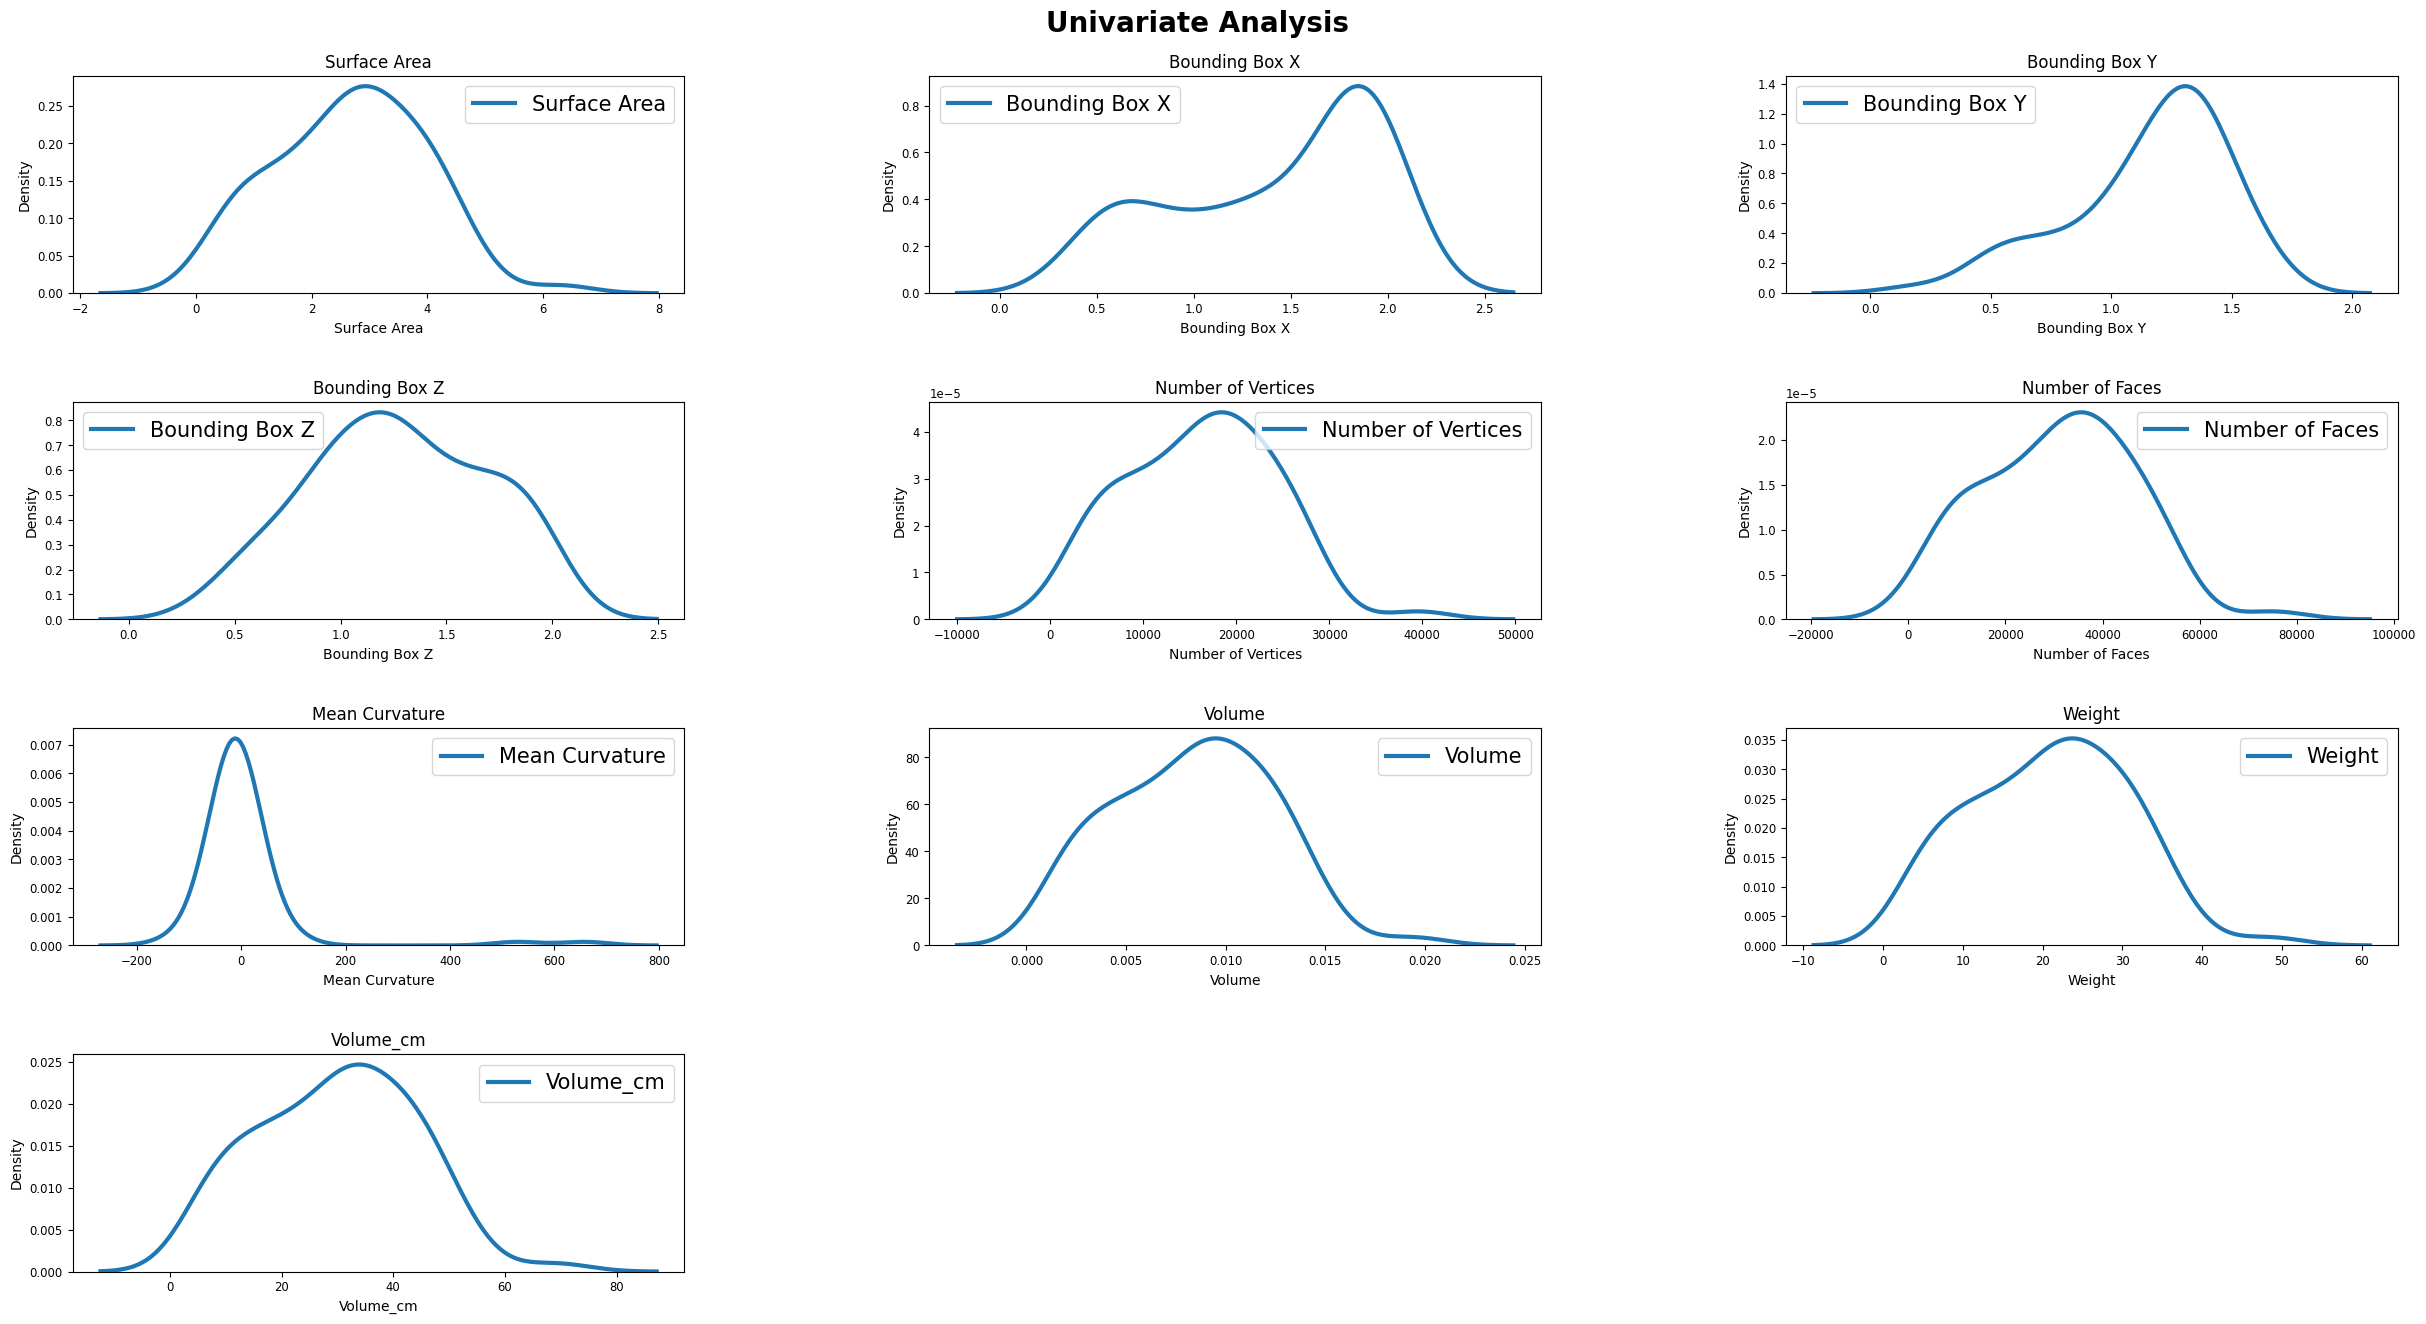

In [9]:
fig = plt.figure(figsize=[30, 22])
fig.suptitle('Univariate Analysis', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.95)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, col in enumerate(num_feature):
    a = fig.add_subplot(6, 3, i+1)

    # using sns.kdeplot to show density
    sns.kdeplot(data=df[col], ax=a)

    a.set_title(col)
    a.legend([col], fontsize=15)

plt.show()

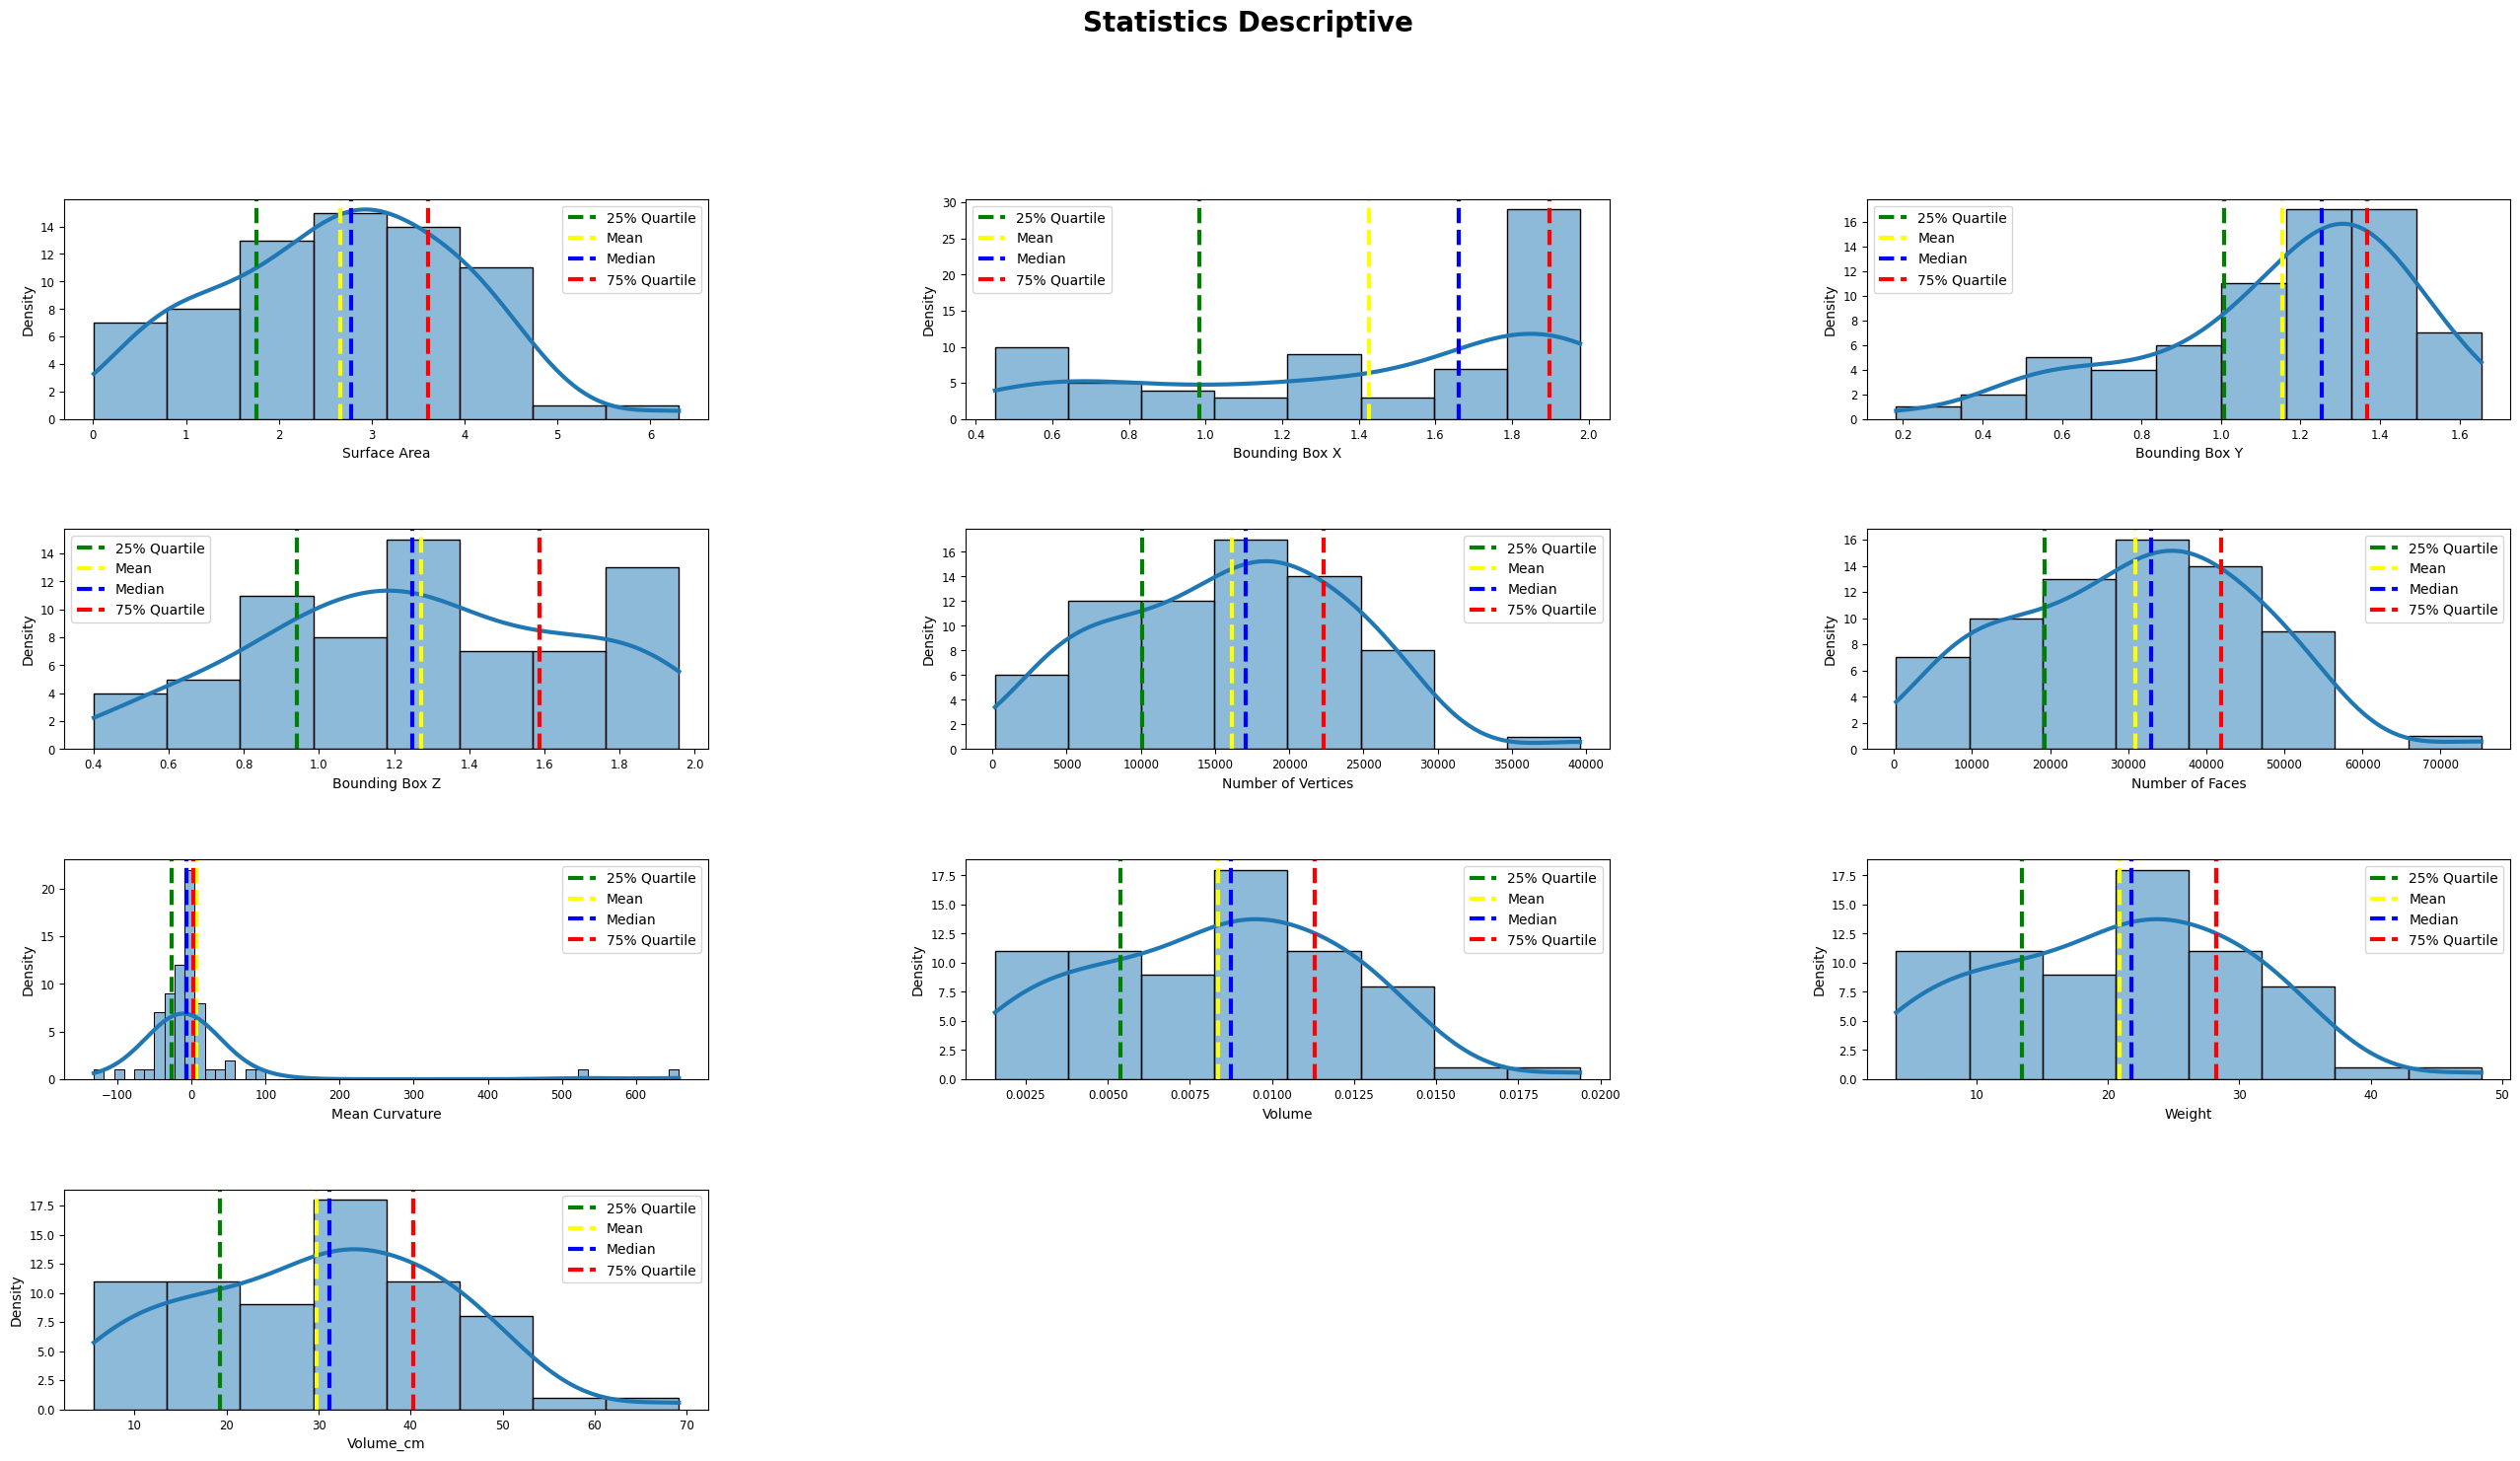

In [10]:
# Create figure
fig = plt.figure(figsize=[32,24])
fig.suptitle('Statistics Descriptive', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, feature in enumerate(num_feature):
    # Adding subplot
    plots = fig.add_subplot(6, 3, i+1)

    # plot the distribution using histplot
    sns.histplot(df[feature], ax=plots, kde=True)

    # adding quartile and mean line
    plots.axvline(df[feature].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
    plots.axvline(df[feature].mean(), color='yellow', linestyle='--', label='Mean')
    plots.axvline(df[feature].median(), color='blue', linestyle='--', label='Median')
    plots.axvline(df[feature].quantile(q=0.75), color='red', linestyle='--', label='75% Quartile')

    # add legend
    plots.legend(fontsize=10)

    plt.xlabel(feature)
    plt.ylabel('Density')

plt.show()

# Data Pre-processing

Check duplicated data

In [10]:
df.duplicated().sum()

0

Check null values

In [11]:
df.isna().sum()

,0
File Name,0
Surface Area,0
Bounding Box X,0
Bounding Box Y,0
Bounding Box Z,0
Number of Vertices,0
Number of Faces,0
Mean Curvature,0
Volume,0
Weight,0


In [12]:
data = df.copy()
data = data.iloc[:,1:]

### Correlation Matrix

<Axes: >

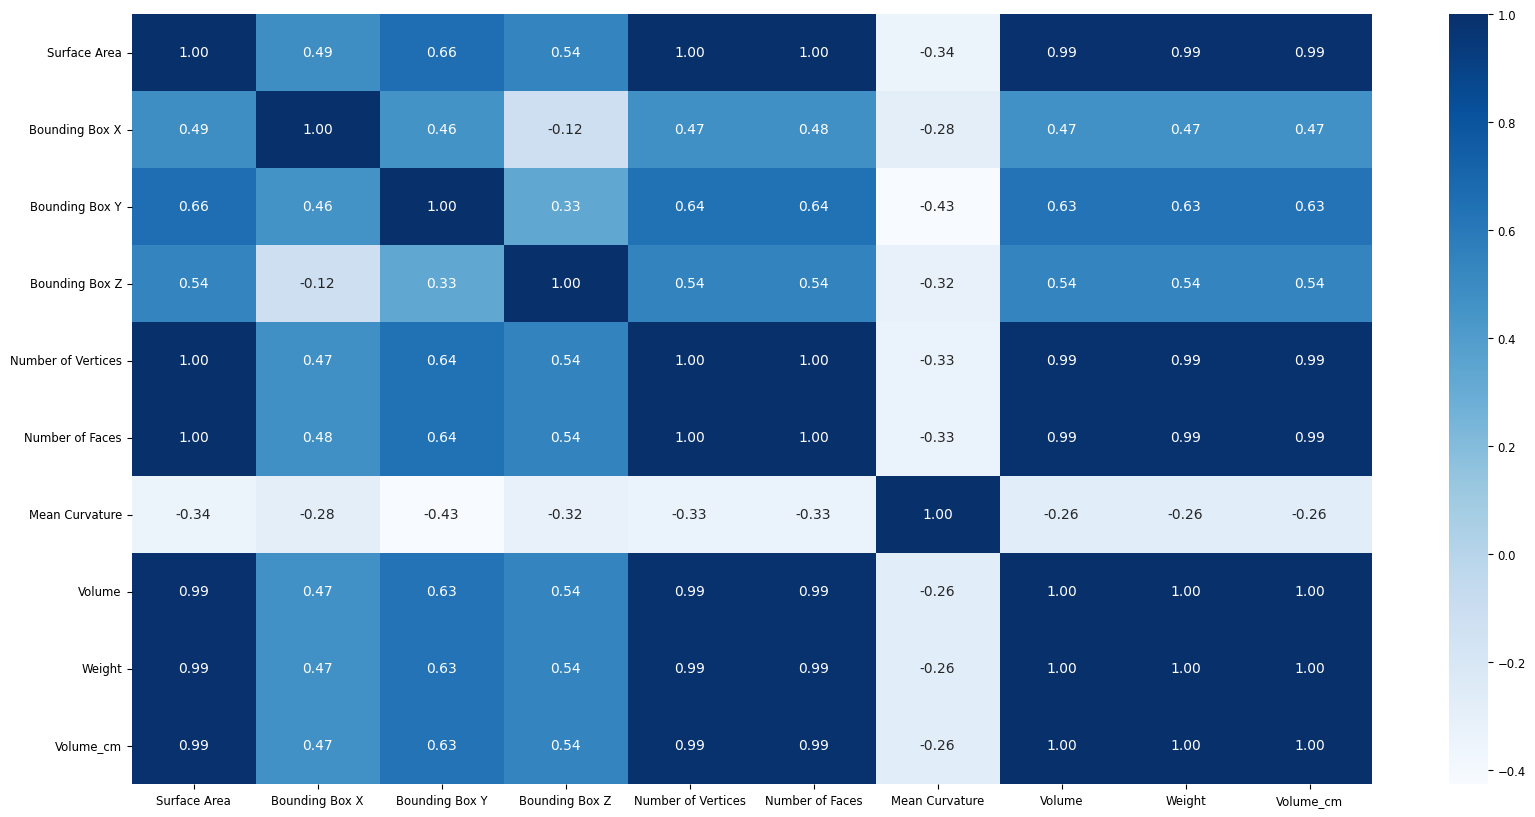

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(numeric_only=True),cmap='Blues',annot=True, fmt='.2f')

# Modelling

### Original Data

In [14]:
X = data.drop(columns=['Weight','Volume_cm'])
y = data.Weight

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:

scaler_standard = StandardScaler()

# Fit scaler hanya pada data training untuk menghindari data leakage
X_train_scaled = scaler_standard.fit_transform(X_train)

# Transform data testing dengan scaler yang sama
X_test_scaled = scaler_standard.transform(X_test)

In [21]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting values using the trained model
y_pred = model.predict(X_test_scaled)

In [22]:
y_pred

array([32.23369518, 22.66450256, 25.59037473, 27.83557409, 18.77990932,
       35.37016209, 30.53180046,  3.90224661, 20.14435416, 21.60086393,
        4.60008664, 25.64163332, 13.56271417, 32.50092656])

### linear Regression

### k-NN, SVR, Random Forest, XGB Regressor

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle


# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fungsi untuk mencetak hasil evaluasi
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'R² Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# ----------------------------------------------
# 1. K-Nearest Neighbors Regressor (KNN)
# ----------------------------------------------
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

knn_param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='r2')
knn_grid_search.fit(X_train, y_train)

print("\nK-Nearest Neighbors Regressor:")
print(f"Best Parameters: {knn_grid_search.best_params_}")
evaluate_model(knn_grid_search.best_estimator_, X_test, y_test)

# ----------------------------------------------
# 2. Support Vector Regressor (SVR)
# ----------------------------------------------
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR())
])

svr_param_grid = {
    'model__C': [0.1, 1, 10],
    'model__epsilon': [0.1, 0.2, 0.5],
    'model__kernel': ['linear', 'rbf']
}

svr_grid_search = GridSearchCV(svr_pipeline, svr_param_grid, cv=5, scoring='r2')
svr_grid_search.fit(X_train, y_train)

print("\nSupport Vector Regressor:")
print(f"Best Parameters: {svr_grid_search.best_params_}")
evaluate_model(svr_grid_search.best_estimator_, X_test, y_test)

# ----------------------------------------------
# 3. Random Forest Regressor
# ----------------------------------------------
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=0))
])

rf_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='r2')
rf_grid_search.fit(X_train, y_train)

print("\nRandom Forest Regressor:")
print(f"Best Parameters: {rf_grid_search.best_params_}")
evaluate_model(rf_grid_search.best_estimator_, X_test, y_test)

# ----------------------------------------------
# 4. Gradient Boosting Regressor
# ----------------------------------------------
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=0))
])

gb_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='r2')
gb_grid_search.fit(X_train, y_train)

print("\nGradient Boosting Regressor:")
print(f"Best Parameters: {gb_grid_search.best_params_}")
evaluate_model(gb_grid_search.best_estimator_, X_test, y_test)


pickle.dump(gb_grid_search, open('gb.pkl', 'wb'))



K-Nearest Neighbors Regressor:
Best Parameters: {'model__n_neighbors': 3, 'model__weights': 'distance'}
R² Score: 0.95
Mean Absolute Error (MAE): 1.85
Mean Squared Error (MSE): 5.69
Root Mean Squared Error (RMSE): 2.39

Support Vector Regressor:
Best Parameters: {'model__C': 10, 'model__epsilon': 0.1, 'model__kernel': 'linear'}
R² Score: 1.00
Mean Absolute Error (MAE): 0.24
Mean Squared Error (MSE): 0.44
Root Mean Squared Error (RMSE): 0.67

Random Forest Regressor:
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}
R² Score: 0.97
Mean Absolute Error (MAE): 1.01
Mean Squared Error (MSE): 2.77
Root Mean Squared Error (RMSE): 1.66

Gradient Boosting Regressor:
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
R² Score: 0.98
Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 2.11
Root Mean Squared Error (RMSE): 1.45


In [27]:
!pip install scikeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


### Neural Networks

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fungsi untuk membuat model neural network
def create_model(optimizer='adam', activation='relu', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1))  # Output layer untuk regresi
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Membangun pipeline dengan scaler dan regressor neural network
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KerasRegressor(model=create_model, verbose=0))
])

# Mempersiapkan parameter grid untuk tuning
param_grid = {
    'model__model__optimizer': ['adam', 'rmsprop'],
    'model__model__activation': ['relu', 'tanh'],
    'model__model__neurons': [16, 32, 64],
    'model__epochs': [50, 100],
    'model__batch_size': [10, 20]
}

# Menggunakan GridSearchCV untuk tuning hyperparameter
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("\nNeural Network Regressor:")
print(f"Best Parameters: {grid_search.best_params_}")

# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo


Neural Network Regressor:
Best Parameters: {'model__batch_size': 10, 'model__epochs': 100, 'model__model__activation': 'tanh', 'model__model__neurons': 64, 'model__model__optimizer': 'adam'}
R² Score: 0.84
Mean Absolute Error (MAE): 1.72
Mean Squared Error (MSE): 3.96
Root Mean Squared Error (RMSE): 1.99


### Linear Regression

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline


# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat pipeline untuk preprocessing dan model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step untuk scaling data
    ('model', LinearRegression())  # Step untuk model regresi linier
])

# Mempersiapkan parameter grid untuk tuning
param_grid = {
    'model__fit_intercept': [True, False],   # Parameter untuk menentukan apakah intercept akan di-fit atau tidak
}

# Menggunakan GridSearchCV untuk tuning hyperparameter
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')  # Menggunakan R² sebagai metrik scoring
grid_search.fit(X_train, y_train)  # Melatih model dengan GridSearchCV

# Menampilkan hyperparameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Best Parameters: {'model__fit_intercept': True}
R² Score: 0.84
Mean Absolute Error (MAE): 1.68
Mean Squared Error (MSE): 3.92
Root Mean Squared Error (RMSE): 1.98
